Welcome to Salary Prediction System
Press ENTER key to procede

0 ... Salary_Data.csv
Select file to create ML model0
Salary_Data.csv is selected
Reading csv file
Creating Dataset
Dataset created
Enter test data size (between 0 and 1)0.2
Model Creation in progress
Model is created
Press ENTER key to predict test data in trained model

[[4. ]
 [4.1]
 [3.2]
 [6. ]
 [5.3]
 [9.6]] ... [ 56957.  57081.  64445.  93940.  83088. 112635.] ... [ 63157.76766164  64106.99066203  55563.98365855  82142.22766937
  75497.66666667 116314.25568328]
[4.] ... 56957.0 ... 63157.76766164349
[4.1] ... 57081.0 ... 64106.990662029886
[3.2] ... 64445.0 ... 55563.9836585523
[6.] ... 93940.0 ... 82142.22766937147
[5.3] ... 83088.0 ... 75497.66666666667
[9.6] ... 112635.0 ... 116314.2556832818
Press ENTER key to see above result in graphical format



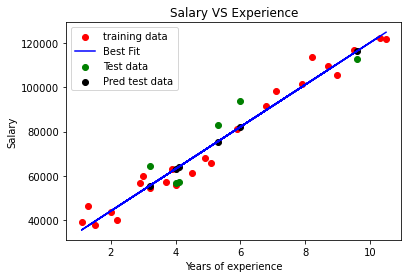

Our model is 85.18% accurate
Now you can predict salary of an employee using our model

Enter experience in years of the candidates, seperated by comma
6.5,2.2,1.5,4.3,0.5


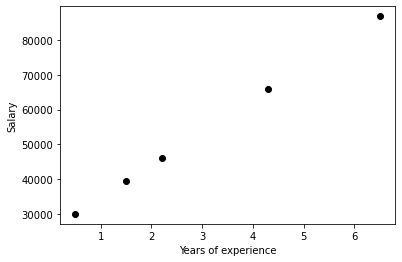

   Experience      Salaries
0         6.5  86888.342671
1         2.2  46071.753655
2         1.5  39427.192652
3         4.3  66005.436663
4         0.5  29934.962648



In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def welcome():
    print("Welcome to Salary Prediction System")
    print("Press ENTER key to procede")
    input()

def checkcsv():
    csv_files=[]
    cur_dir=os.getcwd()
    content_list=os.listdir(cur_dir)
    for x in content_list:
        if x.split('.')[-1]=='csv':
            csv_files.append(x)
    if len(csv_files)==0:
        return 'No csv file in the directory'
    else:
        return csv_files
        
def display_and_select_csv(csv_files):
    i=0
    for file_name in csv_files:
        print(i,'...',file_name)
        i+=1
    return csv_files[int(input("Select file to create ML model"))]

def graph(x_train,y_train,regressionObject,x_test,y_test,y_pred):
    plt.scatter(x_train,y_train,color='red',label='training data')
    plt.plot(x_train,regressionObject.predict(x_train),color='blue',label='Best Fit')
    plt.scatter(x_test,y_test,color='green',label='Test data')
    plt.scatter(x_test,y_pred,color='black',label='Pred test data')
    plt.title("Salary VS Experience")
    plt.xlabel("Years of experience")
    plt.ylabel("Salary")
    plt.legend()
    plt.show()
    
def main():
    welcome()
    try:
        csv_files=checkcsv()
        if csv_files=='No csv file in the directory':
            raise FileNotFoundError('No csv file in the directory')
        csv_file=display_and_select_csv(csv_files)
        print(csv_file,'is selected')
        print("Reading csv file")
        print("Creating Dataset")
        dataset=pd.read_csv(csv_file)
        print("Dataset created")
        x=dataset.iloc[:,:-1].values
        y=dataset.iloc[:,-1].values
        s=float(input("Enter test data size (between 0 and 1)"))
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=s)
        print("Model Creation in progress")
        regressionObject=LinearRegression()
        regressionObject.fit(x_train,y_train)
        print("Model is created")
        print("Press ENTER key to predict test data in trained model")
        input()
        y_pred=regressionObject.predict(x_test)
        i=0
        print(x_test,'...',y_test,'...',y_pred)
        while i<len(x_test):
            print(x_test[i],'...',y_test[i],'...',y_pred[i])
            i+=1
        print("Press ENTER key to see above result in graphical format")
        input()
        graph(x_train,y_train,regressionObject,x_test,y_test,y_pred)
        r2=r2_score(y_test,y_pred)
        print("Our model is %2.2f%% accurate" %(r2*100))
        print("Now you can predict salary of an employee using our model")
        print("\nEnter experience in years of the candidates, seperated by comma")
        exp=[float(e) for e in input().split(',')]
        ex=[]
        for x in exp:
            ex.append([x])
        experience=np.array(ex)
        salaries=regressionObject.predict(experience)
        plt.scatter(experience,salaries,color='black')
        plt.xlabel("Years of experience")
        plt.ylabel("Salary")
        plt.show()
        d=pd.DataFrame({'Experience':exp,'Salaries':salaries})
        print(d)
        
    except FileNotFoundError:
        print('No csv file in the directory')
        print("Press ENTER key to exit")
        input()
        exit()
if __name__=="__main__":
    main()
    input()